In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')

# Global matplotlib style settings
plt.rcParams.update({
    'axes.titlesize': 10,     # size of subplot titles
    'axes.labelsize': 10,     # size of x and y labels
    'xtick.labelsize': 8,     # size of x tick labels
    'ytick.labelsize': 8,     # size of y tick labels
    'legend.fontsize': 9,     # legend font
    'figure.titlesize': 12    # main figure title
})

In [4]:
df_flights = pd.read_csv('/kaggle/input/flight-delay-csv/full_data_flightdelay.csv')

# Structure investigation

In [5]:
df_flights.shape

(6489062, 26)

In [6]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489062 entries, 0 to 6489061
Data columns (total 26 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   MONTH                          int64  
 1   DAY_OF_WEEK                    int64  
 2   DEP_DEL15                      int64  
 3   DEP_TIME_BLK                   object 
 4   DISTANCE_GROUP                 int64  
 5   SEGMENT_NUMBER                 int64  
 6   CONCURRENT_FLIGHTS             int64  
 7   NUMBER_OF_SEATS                int64  
 8   CARRIER_NAME                   object 
 9   AIRPORT_FLIGHTS_MONTH          int64  
 10  AIRLINE_FLIGHTS_MONTH          int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  int64  
 12  AVG_MONTHLY_PASS_AIRPORT       int64  
 13  AVG_MONTHLY_PASS_AIRLINE       int64  
 14  FLT_ATTENDANTS_PER_PASS        float64
 15  GROUND_SERV_PER_PASS           float64
 16  PLANE_AGE                      int64  
 17  DEPARTING_AIRPORT              object 
 18  LA

In [7]:
df_flights.head()

MONTH  DAY_OF_WEEK  DEP_DEL15 DEP_TIME_BLK  DISTANCE_GROUP  SEGMENT_NUMBER  \
0      1            7          0    0800-0859               2               1   
1      1            7          0    0700-0759               7               1   
2      1            7          0    0600-0659               7               1   
3      1            7          0    0600-0659               9               1   
4      1            7          0    0001-0559               7               1   

   CONCURRENT_FLIGHTS  NUMBER_OF_SEATS            CARRIER_NAME  \
0                  25              143  Southwest Airlines Co.   
1                  29              191    Delta Air Lines Inc.   
2                  27              199    Delta Air Lines Inc.   
3                  27              180    Delta Air Lines Inc.   
4                  10              182        Spirit Air Lines   

   AIRPORT_FLIGHTS_MONTH  ...  PLANE_AGE       DEPARTING_AIRPORT  LATITUDE  \
0                  13056  ...          8  McCarran International     36.08   
1                  13056  ...          3  McCarran International     36.08   
2                  13056  ...         18  McCarran International     36.08   
3                  13056  ...          2  McCarran International     36.08   
4                  13056  ...          1  McCarran International     36.08   

   LONGITUDE  PREVIOUS_AIRPORT  PRCP  SNOW SNWD  TMAX  AWND  
0   -115.152              NONE   0.0   0.0  0.0  65.0  2.91  
1   -115.152              NONE   0.0   0.0  0.0  65.0  2.91  
2   -115.152              NONE   0.0   0.0  0.0  65.0  2.91  
3   -115.152              NONE   0.0   0.0  0.0  65.0  2.91  
4   -115.152              NONE   0.0   0.0  0.0  65.0  2.91  

[5 rows x 26 columns]

# Non-Numerical Features

In [8]:
df_flights.select_dtypes(exclude="number").sample(5)

DEP_TIME_BLK            CARRIER_NAME  \
1753228    1400-1459  Southwest Airlines Co.   
4506557    1700-1759  Southwest Airlines Co.   
676471     1700-1759  American Airlines Inc.   
1910797    0800-0859    Delta Air Lines Inc.   
3699722    2000-2059   SkyWest Airlines Inc.   

                        DEPARTING_AIRPORT  \
1753228               Logan International   
4506557  Phoenix Sky Harbor International   
676471                Miami International   
1910797                 Atlanta Municipal   
3699722             Seattle International   

                             PREVIOUS_AIRPORT  
1753228               Nashville International  
4506557  San Diego International Lindbergh Fl  
676471                                   NONE  
1910797                                  NONE  
3699722                    Boise Air Terminal

In [9]:
df_flights.describe(exclude="number")

DEP_TIME_BLK            CARRIER_NAME  DEPARTING_AIRPORT  \
count       6489062                 6489062            6489062   
unique           19                      17                 96   
top       0800-0859  Southwest Airlines Co.  Atlanta Municipal   
freq         452391                 1296329             392603   

       PREVIOUS_AIRPORT  
count           6489062  
unique              356  
top                NONE  
freq            1449009

# Numerical Features

In [10]:
df_flights.describe()

MONTH   DAY_OF_WEEK     DEP_DEL15  DISTANCE_GROUP  \
count  6.489062e+06  6.489062e+06  6.489062e+06    6.489062e+06   
mean   6.607062e+00  3.935598e+00  1.891441e-01    3.821102e+00   
std    3.396853e+00  1.995200e+00  3.916231e-01    2.382233e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00    1.000000e+00   
25%    4.000000e+00  2.000000e+00  0.000000e+00    2.000000e+00   
50%    7.000000e+00  4.000000e+00  0.000000e+00    3.000000e+00   
75%    1.000000e+01  6.000000e+00  0.000000e+00    5.000000e+00   
max    1.200000e+01  7.000000e+00  1.000000e+00    1.100000e+01   

       SEGMENT_NUMBER  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  \
count    6.489062e+06        6.489062e+06     6.489062e+06   
mean     3.046890e+00        2.783675e+01     1.337397e+02   
std      1.757864e+00        2.151060e+01     4.645213e+01   
min      1.000000e+00        1.000000e+00     4.400000e+01   
25%      2.000000e+00        1.100000e+01     9.000000e+01   
50%      3.000000e+00        2.300000e+01     1.430000e+02   
75%      4.000000e+00        3.900000e+01     1.720000e+02   
max      1.500000e+01        1.090000e+02     3.370000e+02   

       AIRPORT_FLIGHTS_MONTH  AIRLINE_FLIGHTS_MONTH  \
count           6.489062e+06           6.489062e+06   
mean            1.268458e+04           6.296058e+04   
std             8.839796e+03           3.438223e+04   
min             1.100000e+03           5.582000e+03   
25%             5.345000e+03           2.503400e+04   
50%             1.156200e+04           7.087800e+04   
75%             1.761500e+04           8.631200e+04   
max             3.525600e+04           1.177280e+05   

       AIRLINE_AIRPORT_FLIGHTS_MONTH  ...  FLT_ATTENDANTS_PER_PASS  \
count                   6.489062e+06  ...             6.489062e+06   
mean                    3.459251e+03  ...             9.753707e-05   
std                     4.251139e+03  ...             8.644459e-05   
min                     1.000000e+00  ...             0.000000e+00   
25%                     6.540000e+02  ...             3.419267e-05   
50%                     2.251000e+03  ...             6.178236e-05   
75%                     4.806000e+03  ...             1.441659e-04   
max                     2.183700e+04  ...             3.484077e-04   

       GROUND_SERV_PER_PASS     PLANE_AGE      LATITUDE     LONGITUDE  \
count          6.489062e+06  6.489062e+06  6.489062e+06  6.489062e+06   
mean           1.355612e-04  1.153211e+01  3.670581e+01 -9.425515e+01   
std            4.649970e-05  6.935706e+00  5.500804e+00  1.790952e+01   
min            7.134695e-06  0.000000e+00  1.844000e+01 -1.593460e+02   
25%            9.889412e-05  5.000000e+00  3.343600e+01 -1.063770e+02   
50%            1.246511e-04  1.200000e+01  3.750500e+01 -8.790600e+01   
75%            1.772872e-04  1.700000e+01  4.077900e+01 -8.093600e+01   
max            2.289855e-04  3.200000e+01  6.116900e+01 -6.600200e+01   

               PRCP          SNOW          SNWD          TMAX          AWND  
count  6.489062e+06  6.489062e+06  6.489062e+06  6.489062e+06  6.489062e+06  
mean   1.037063e-01  3.159310e-02  9.152397e-02  7.146846e+01  8.341329e+00  
std    3.432134e-01  3.170163e-01  7.281285e-01  1.835333e+01  3.607604e+00  
min    0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+01  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  5.900000e+01  5.820000e+00  
50%    0.000000e+00  0.000000e+00  0.000000e+00  7.400000e+01  7.830000e+00  
75%    2.000000e-02  0.000000e+00  0.000000e+00  8.600000e+01  1.029000e+01  
max    1.163000e+01  1.720000e+01  2.520000e+01  1.150000e+02  3.378000e+01  

[8 rows x 22 columns]

# Unique Values Per Numerical Column

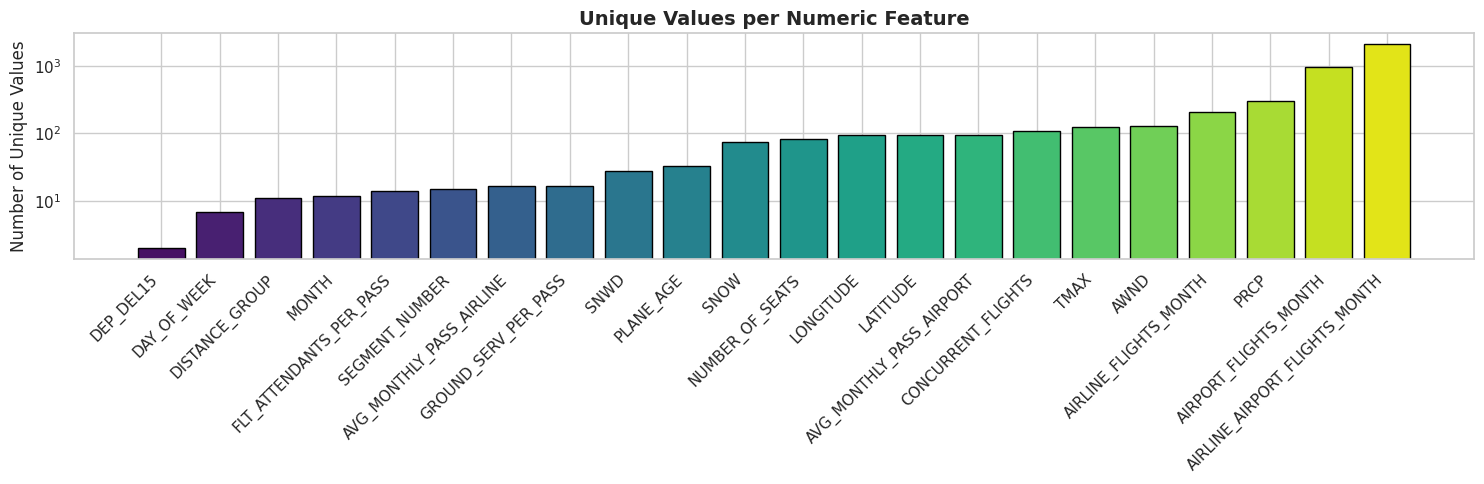

In [11]:
unique_values = df_flights.select_dtypes(include="number").nunique().sort_values()

sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))
bars = plt.bar(
    unique_values.index,
    unique_values.values,
    log=True,                           
    color=sns.color_palette("viridis", len(unique_values)), 
    edgecolor='black'
)

plt.title("Unique Values per Numeric Feature", fontsize=14, weight='bold')
plt.ylabel("Number of Unique Values")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


### The above visual shows the number of distinct (unique) values present in each numeric feature of the flight delay dataset, using a log scale for visualization.
### Features with **fewer** unique values (e.g., DAY_OF_WEEK, DISTANCE_GROUP) are **categorical-like** and can be used for grouped performance analysis, such as delay patterns by day or route length.
### Features with **many** unique values (e.g., AIRLINE_AIRPORT_FLIGHTS_MONTH, PRCP) are **continuous** and can capture fine-grained operational and weather variations that may influence delays. 

# Quality Investigation
### Finding missing and duplicate data

In [12]:
df_flights.isna().sum()

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64

In [13]:
# Check number of duplicates
n_duplicates = df_flights.duplicated().sum()
print(f"There seem to be {n_duplicates} duplicates in the dataset, dropping them")
df_flights = df_flights.drop_duplicates()
df_flights.shape

There seem to be 28473 duplicates in the dataset, dropping them


(6460589, 26)

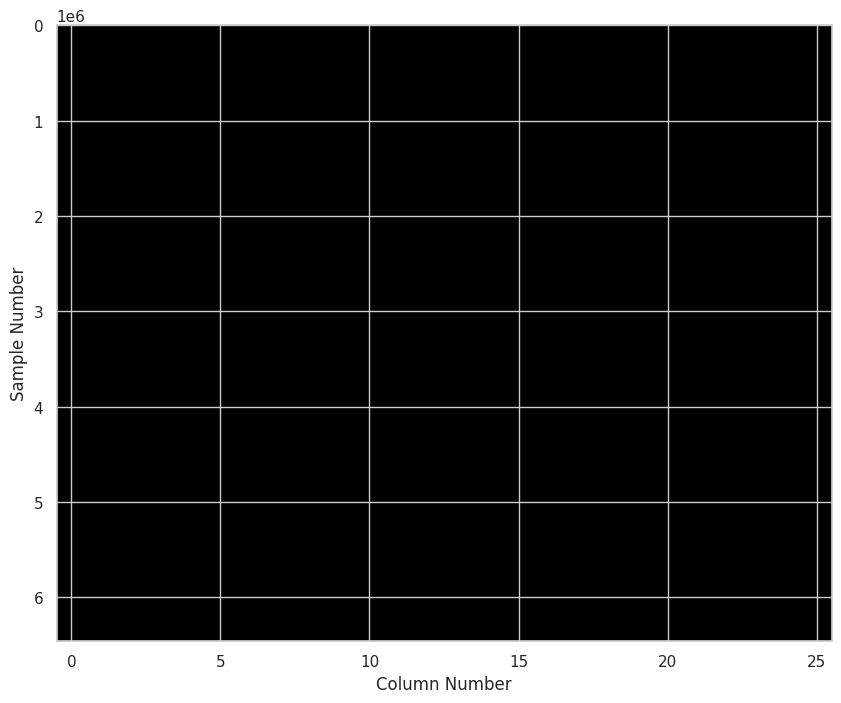

In [14]:
plt.figure(figsize=(10, 8))
plt.imshow(df_flights.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

### The above figure shows 6460589 individual samples on the y-axis , and 26 features on the x-axis.
### This missing-value heatmap shows no white spaces, meaning there are no missing values in the dataset, highlighting **Data Completeness**.
### This ensures high data quality and reliability for modeling and business decisions.


# Content Investigation

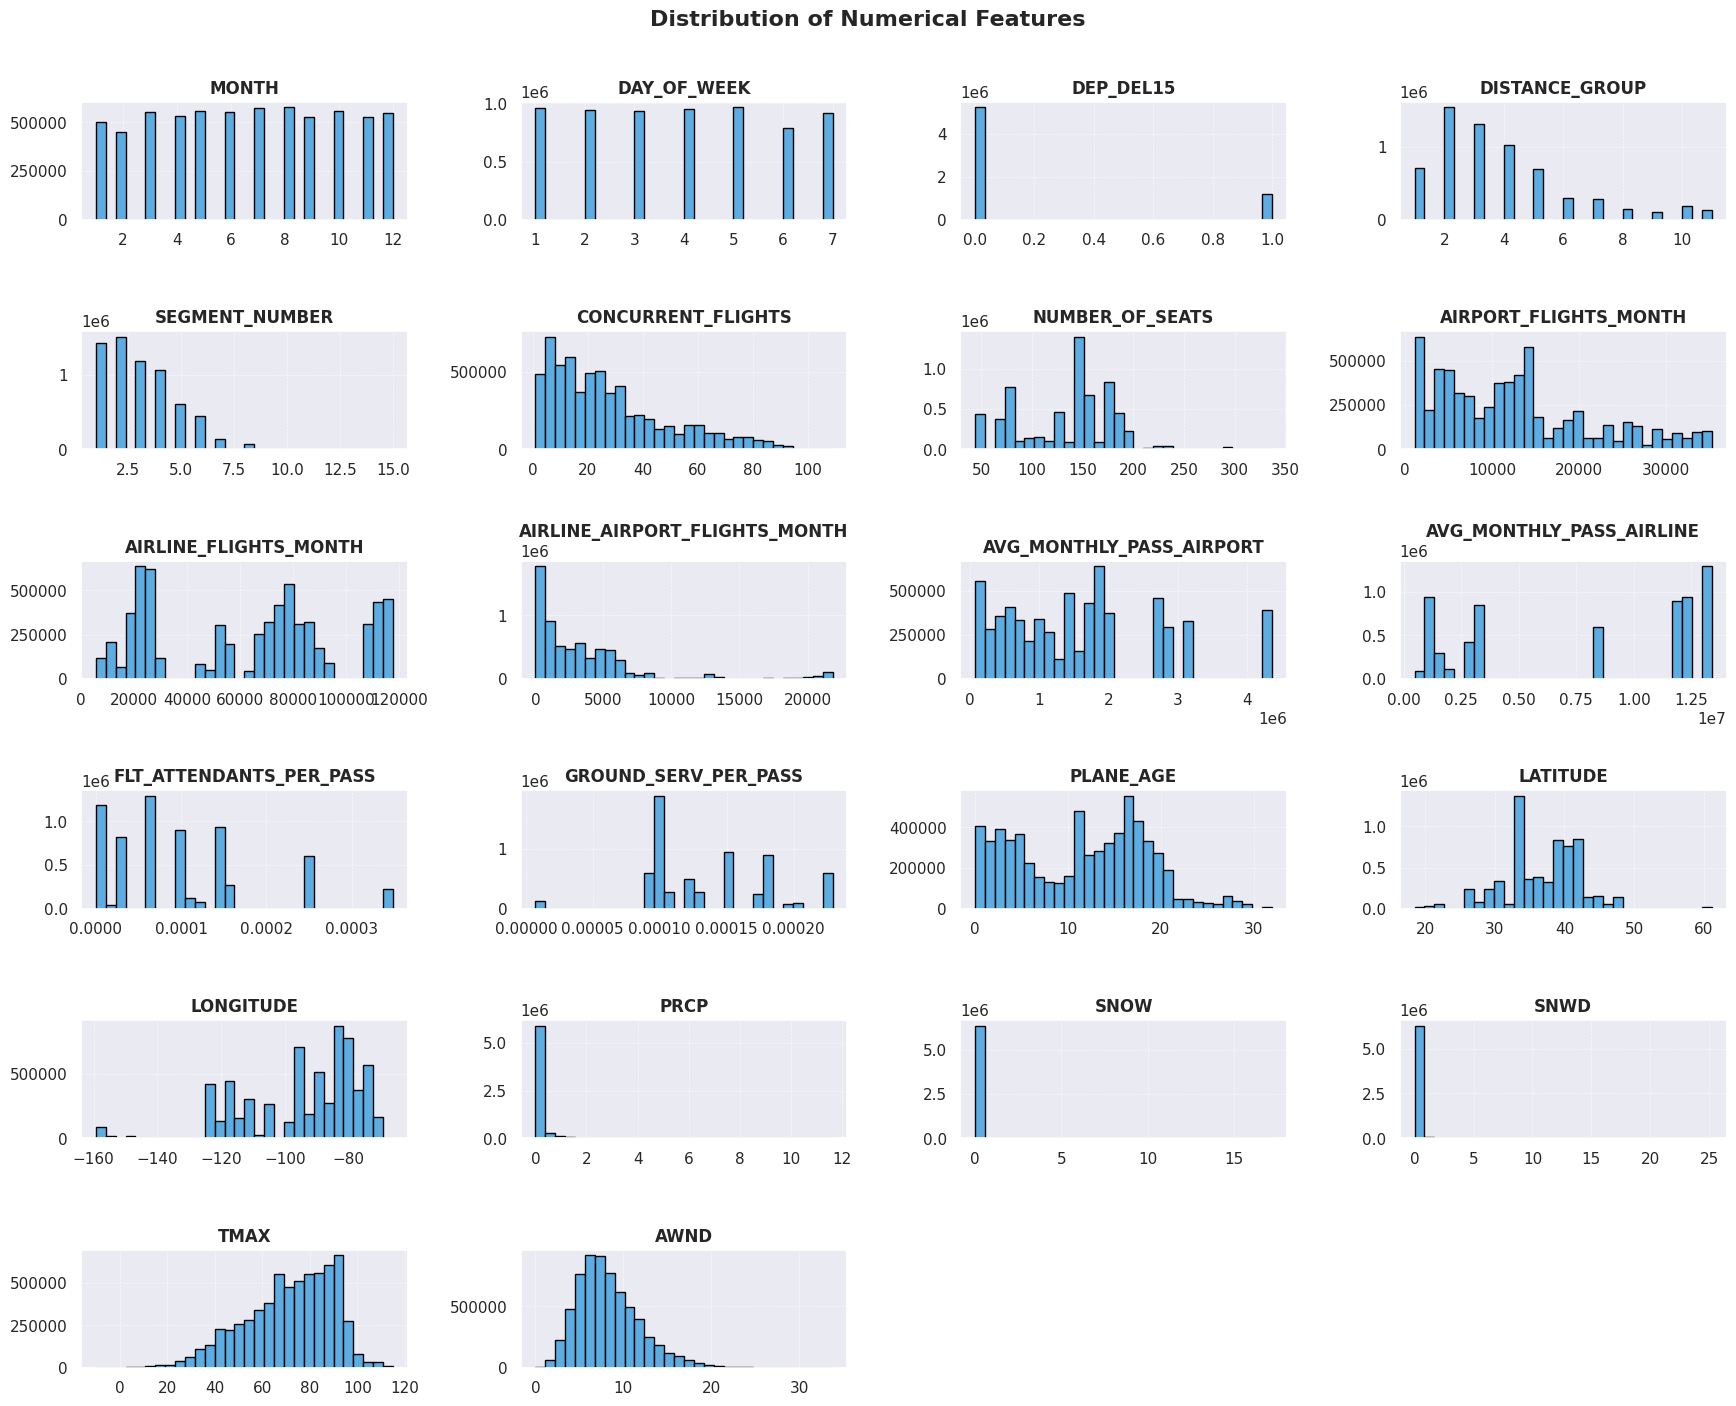

In [15]:
sns.set(style="darkgrid")
colors = sns.color_palette("cubehelix", len(df_flights.select_dtypes("number").columns))

fig = df_flights.hist(
    bins=30,
    figsize=(18, 14),
    layout=(-1, 4),
    color="#5DADE2",       
    edgecolor="black"
)


plt.tight_layout(pad=2.5)

for ax in fig.flatten():
    ax.set_title(ax.get_title(), fontsize=12, fontweight='bold')
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.suptitle("Distribution of Numerical Features", fontsize=16, fontweight='bold', y=1.02)
plt.show()

### The above visual shows the distribution of key numerical features in the dataset, helping identify data patterns and operational characteristics.

**MONTH and DAY_OF_WEEK are evenly spread**, ensuring seasonality and weekday effects can be studied without bias.

**DEP_DEL15 shows most flights depart on time**, but delays still exist in a notable minority.

**DISTANCE_GROUP skews toward shorter-to-midrange flights**, aligning with typical U.S. domestic travel patterns.

**SEGMENT_NUMBER is mostly 1**, meaning direct flights dominate.

**CONCURRENT_FLIGHTS and AIRPORT/ AIRLINE traffic features vary widely**, showing differences in airport and airline capacity that can influence delays.

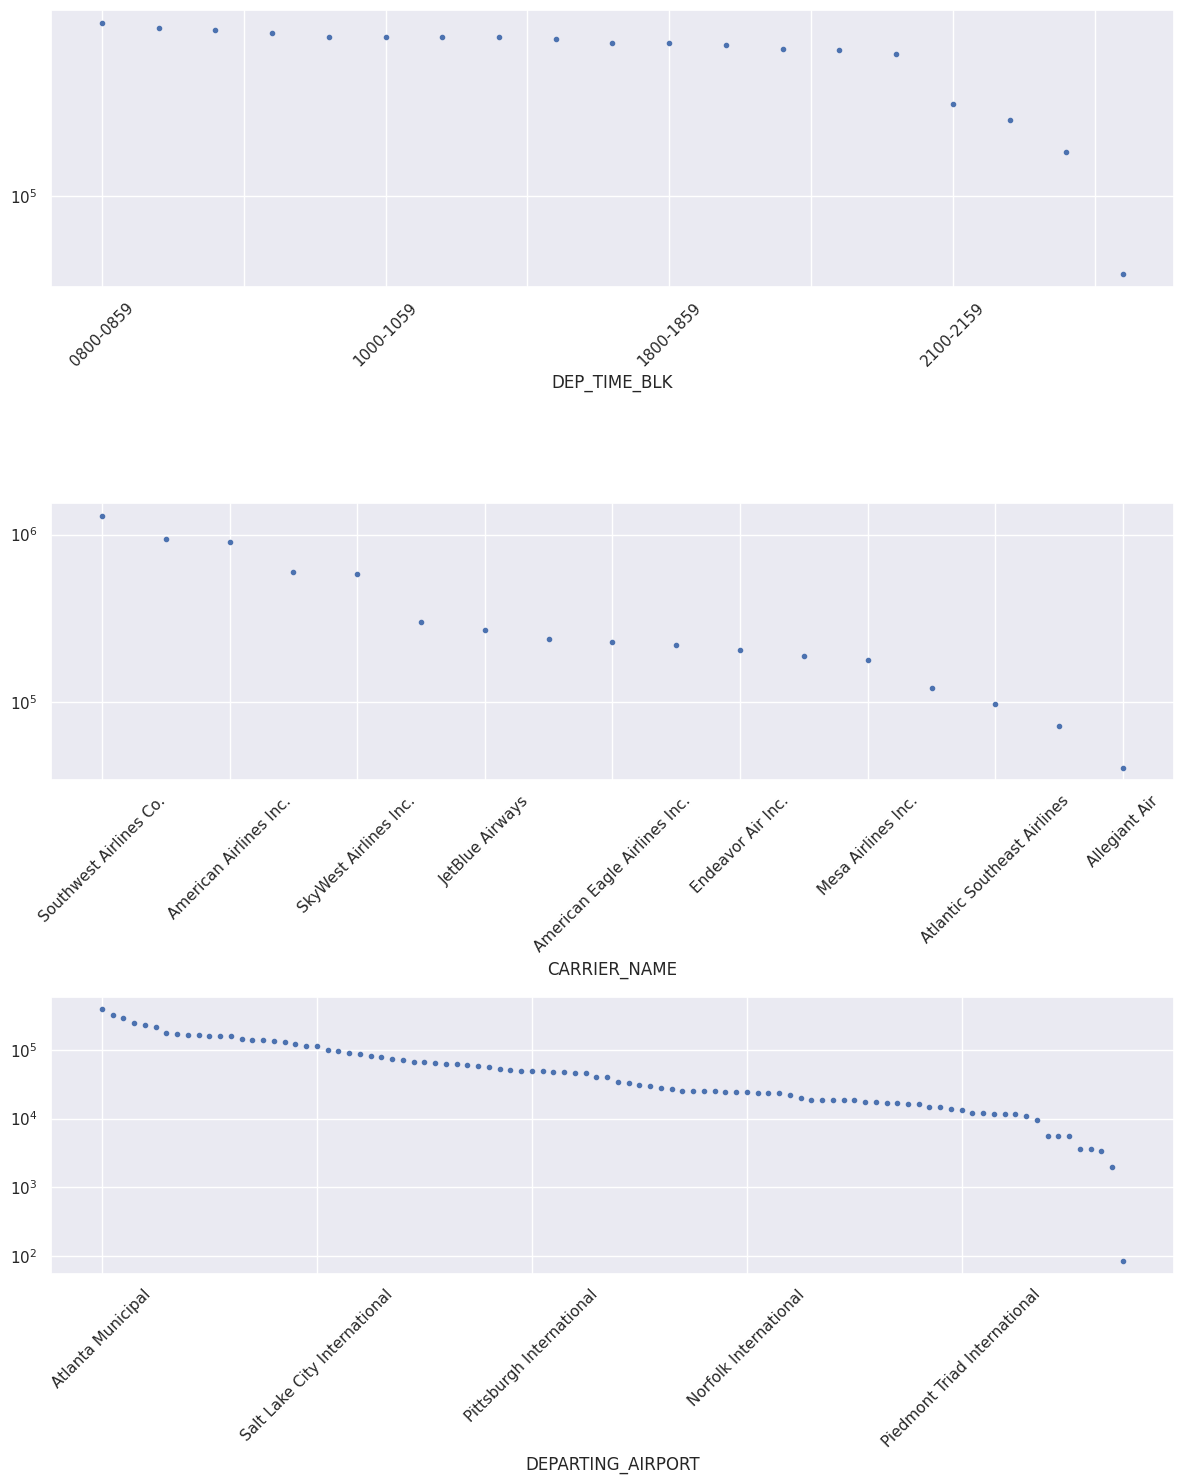

In [16]:
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 15))

df_non_numerical = df_flights.select_dtypes(exclude=["number", "datetime"])

for col, ax in zip(df_non_numerical.columns, axes.ravel()):
    df_non_numerical[col].value_counts().plot(
        logy=True, lw=0, marker=".", ax=ax
    )
    
    ax.set_title("")  
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Airlines and airports should focus resources and staff on peak daytime hours, as that’s when congestion and delay risk are highest.
### Operational planning and delay mitigation efforts should prioritize high-volume carriers, as improving their reliability impacts the largest number of customers.
### The highest-traffic airports are key nodes; investments in infrastructure or efficiency improvements here yield the biggest improvements in overall system performance and delay reduction.

# ====Content Investigation====

In [17]:
def val_cnt(col):
  print("The percentage of variables in ",end="")
  print(df_flights[col].value_counts(normalize = True) * 100)

### Built a function that shows the distrubution of discerete columns in precents, by entering a column from data frame

In [18]:
# MONTH
val_cnt('MONTH')

The percentage of variables in MONTH
8     8.932266
7     8.908336
10    8.652137
5     8.601337
6     8.584558
3     8.538262
12    8.502367
4     8.223585
11    8.194578
9     8.166144
1     7.737421
2     6.959009
Name: proportion, dtype: float64


### By identifying months with the highest percentage of flights, businesses can align promotional campaigns, 
### maintenance schedules, and contingency planning with demand cycles, capturing revenue opportunities and reducing risk during peak travel periods.

In [19]:
# DAY
val_cnt('DAY_OF_WEEK')

The percentage of variables in DAY_OF_WEEK
5    14.932911
1    14.905700
4    14.725654
2    14.588206
3    14.459038
7    14.211723
6    12.176769
Name: proportion, dtype: float64


### The distribution is almost even, with each day accounting for roughly 12%–15% of total flights. 
### This confirms that airlines maintain consistent schedules throughout the week and highlights that no single day is dramatically busier than others.
### For airline operations and staffing, it means resources can be evenly allocated across all days, reducing excess costs from overstaffing or bottlenecks.

In [20]:
month_to_season = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}
df_flights['SEASON'] = df_flights['MONTH'].map(month_to_season)
df_flights[["MONTH", "SEASON"]].sample(10)

MONTH  SEASON
4888501     10    Fall
4147628      8  Summer
5828125     11    Fall
4990045     10    Fall
4357831      9    Fall
1841370      4  Spring
1069359      3  Spring
4305368      8  Summer
2431065      5  Spring
4367511      9    Fall

In [21]:
# SEASON
val_cnt("SEASON")

The percentage of variables in SEASON
Summer    26.425160
Spring    25.363183
Fall      25.012859
Winter    23.198798
Name: proportion, dtype: float64


### The distribution shows that flight operations are highest in Summer and Spring, reflecting peak travel demand, 
### likely driven by vacations, holidays, and favorable weather conditions.
### Target peak operational efficiency during Summer and Spring, while maintaining robust contingency plans for Winter to ensure smooth flight operations and minimize delays.

In [22]:
# TIME BLOCK
val_cnt("DEP_TIME_BLK")

The percentage of variables in DEP_TIME_BLK
0800-0859    6.939507
0700-0759    6.621935
0600-0659    6.528847
1700-1759    6.326606
1200-1259    6.146467
1000-1059    6.144842
0900-0959    6.113514
1100-1159    6.104335
1500-1559    6.007037
1400-1459    5.814981
1800-1859    5.799982
1600-1659    5.700347
1900-1959    5.541229
1300-1359    5.460988
2000-2059    5.291824
2100-2159    3.420013
2200-2259    2.987452
0001-0559    2.264159
2300-2359    0.785935
Name: proportion, dtype: float64


### Most departures occur during the morning and daytime blocks (especially 06:00–18:00), with peak activity around 08:00–09:00.
### Fewest flights are scheduled in late-night blocks (after 21:00 and especially after midnight).

In [23]:
time_blocks_order = [
    'Early Morning & Late Night',  # 0001-0559
    'Morning',                     # 0600-1159
    'Afternoon',                   # 1200-1659
    'Evening',                     # 1700-1959
    'Night'                        # 2000-2359
]

df_flights['PART_OF_DAY'] = pd.cut(
    df_flights['DEP_TIME_BLK'].map(lambda x: int(x.split('-')[0])),
    bins=[0, 600, 1200, 1700, 2000, 2400],
    labels=time_blocks_order,
    right=False
)

df_flights[["DEP_TIME_BLK", "PART_OF_DAY"]].sample(10)

DEP_TIME_BLK PART_OF_DAY
3961166    1500-1559   Afternoon
2436774    1400-1459   Afternoon
3216402    2000-2059       Night
4948125    1300-1359   Afternoon
2648811    1100-1159     Morning
2795688    0600-0659     Morning
1618724    1900-1959     Evening
6102714    1500-1559   Afternoon
2119314    0600-0659     Morning
3182015    1400-1459   Afternoon

In [24]:
#val_cnt('PART_OF_DAY')

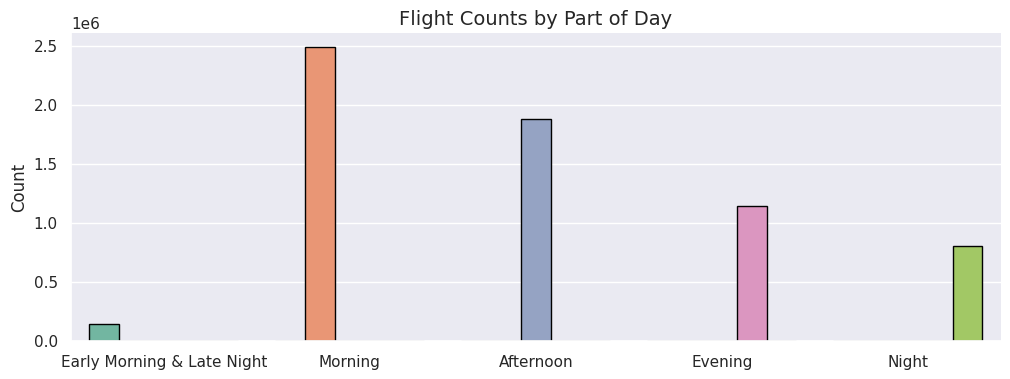

In [25]:
plt.figure(figsize=(12, 4))
sns.countplot(x="PART_OF_DAY", data=df_flights, hue="PART_OF_DAY", palette="Set2", edgecolor="black")
plt.title("Flight Counts by Part of Day", fontsize=14)
plt.xlabel("")
plt.ylabel("Count")
plt.legend().remove()
sns.despine()


### Less flights are there when the time of day is at night, or in the early morning:

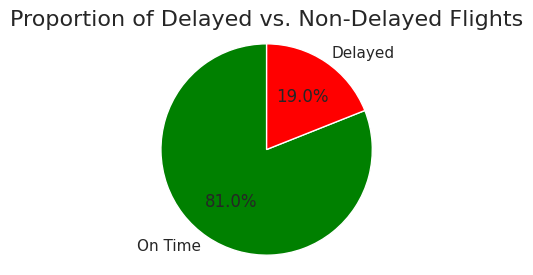

In [26]:
plt.figure(figsize=(3, 3))
plt.pie(df_flights['DEP_DEL15'].value_counts(), labels=['On Time', 'Delayed'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])

plt.title('Proportion of Delayed vs. Non-Delayed Flights', fontsize=16)
plt.axis('equal')

plt.show()

### The distribution in our target variable is about 81% in class 0 (false), and 19% in class 1 (true), when there are 4 times more examples of flights which has no delay in them. 
### It suits the 2019 report about delayed flights from Stacker (https://stacker.com/travel/major-airports-longest-departure-delays), which shows the precentage of delayed departured flights is 19.5% in 2019, in the US.

### Imbalanced target classes in flight delay prediction require targeted modeling strategies

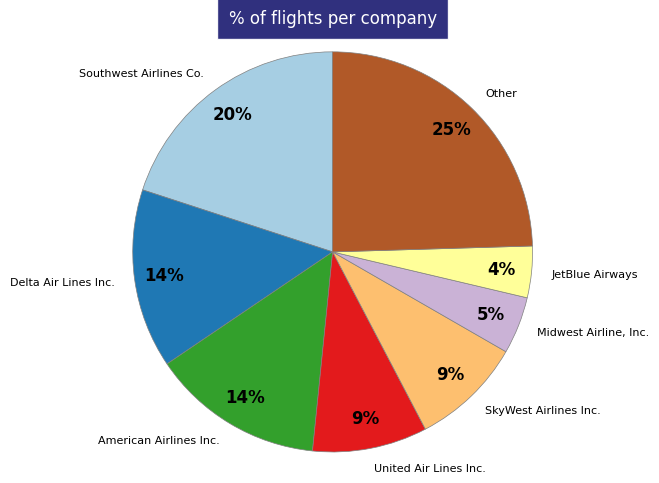

In [27]:
# Calculate proportions
carrier_pct = df_flights['CARRIER_NAME'].value_counts(normalize=True) * 100
main = carrier_pct[carrier_pct >= 3.9]
other = carrier_pct[carrier_pct < 3.9].sum()
carrier_final = pd.concat([main, pd.Series({'Other': other})]) if other else main

# Plot pie chart
plt.figure(figsize=(7, 5))
colors = plt.cm.Paired(np.linspace(0, 1, len(carrier_final)))
wedges, texts, autotexts = plt.pie(carrier_final, labels=carrier_final.index, autopct='%1.0f%%',
                                   startangle=90, pctdistance=0.85, colors=colors,
                                   wedgeprops={'edgecolor': 'gray', 'linewidth': 0.5})

for t in texts: t.set(fontsize=8, color='black')
for at in autotexts: at.set(fontsize=12, color='black', weight='bold')

plt.title('% of flights per company', fontsize=12, color='white',
          bbox=dict(facecolor='midnightblue', alpha=0.9, pad=8))
plt.axis('equal')
plt.tight_layout()
plt.show()


### The chart highlights which airlines drive the bulk of U.S. flight operations and helps businesses prioritize collaboration, market strategy, and operational focus accordingly.

In [28]:
pd.pivot_table(df_flights, index = 'DEP_DEL15', values = 'SNOW', columns = 'SEASON', aggfunc = 'mean')

SEASON        Fall    Spring  Summer    Winter
DEP_DEL15                                     
0          0.01406  0.020577     0.0  0.065539
1          0.06733  0.050861     0.0  0.157219

### Flights delayed in winter are associated with much higher snow levels compared to on-time flights. 
### This insight supports prioritizing snow-related operational contingency planning (de-icing, ground staff allocation) in winter months to mitigate delay risks.
### Snow has little to no impact on delays outside winter (especially in summer, where it is absent).

In [29]:
df_flights.groupby('DEP_DEL15').agg({'AWND': 'mean', 'PRCP': 'mean', 'SNOW': 'mean', 'SNWD': 'mean', 'TMAX': 'mean'})

AWND      PRCP      SNOW      SNWD       TMAX
DEP_DEL15                                                   
0          8.252683  0.090442  0.023930  0.082429  71.544496
1          8.721610  0.160630  0.064455  0.130881  71.128258

### Weather conditions—especially wind, precipitation, and snow—are clearly worse for delayed departures.
### This supports investing in weather-responsive operations (staffing, de-icing, ground logistics) to reduce delays.
### The difference in averages is small since most days/locations see mild weather (most values close to zero), but spikes in these factors coincide with higher delay risk.

In [30]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_flights.groupby('DEP_DEL15').agg({'CONCURRENT_FLIGHTS' : 'mean', 'NUMBER_OF_SEATS': 'mean', 'AIRPORT_FLIGHTS_MONTH' : 'mean', 'AIRLINE_FLIGHTS_MONTH' : 'mean', 'AVG_MONTHLY_PASS_AIRPORT' : 'mean', 'AVG_MONTHLY_PASS_AIRLINE' : 'mean'})

CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  AIRPORT_FLIGHTS_MONTH  \
DEP_DEL15                                                               
0                       27.75           133.47               12575.67   
1                       28.23           134.88               13171.57   

           AIRLINE_FLIGHTS_MONTH  AVG_MONTHLY_PASS_AIRPORT  \
DEP_DEL15                                                    
0                       62952.37                1575960.45   
1                       63221.12                1645056.70   

           AVG_MONTHLY_PASS_AIRLINE  
DEP_DEL15                            
0                        7818546.94  
1                        7829133.02

### Delayed flights consistently see higher averages for concurrent flights, seats, airport flights, and passenger volumes compared to on-time flights.
### Busy environments (more flights, passengers, and seats) increase the likelihood of departure delays.

# Let’s simplify our option by deciding that we treat features with less than 35 unique features as discrete or ordinal features, and the other features as continuous features.

In [31]:
# Creates mask to identify numerical features with more or less than 35 unique features
cols_continuous = df_flights.select_dtypes(include="number").nunique() >= 35

In [32]:
# Create a new dataframe which only contains the continuous features
df_continuous = df_flights[cols_continuous[cols_continuous].index]
df_continuous.shape

(6460589, 12)

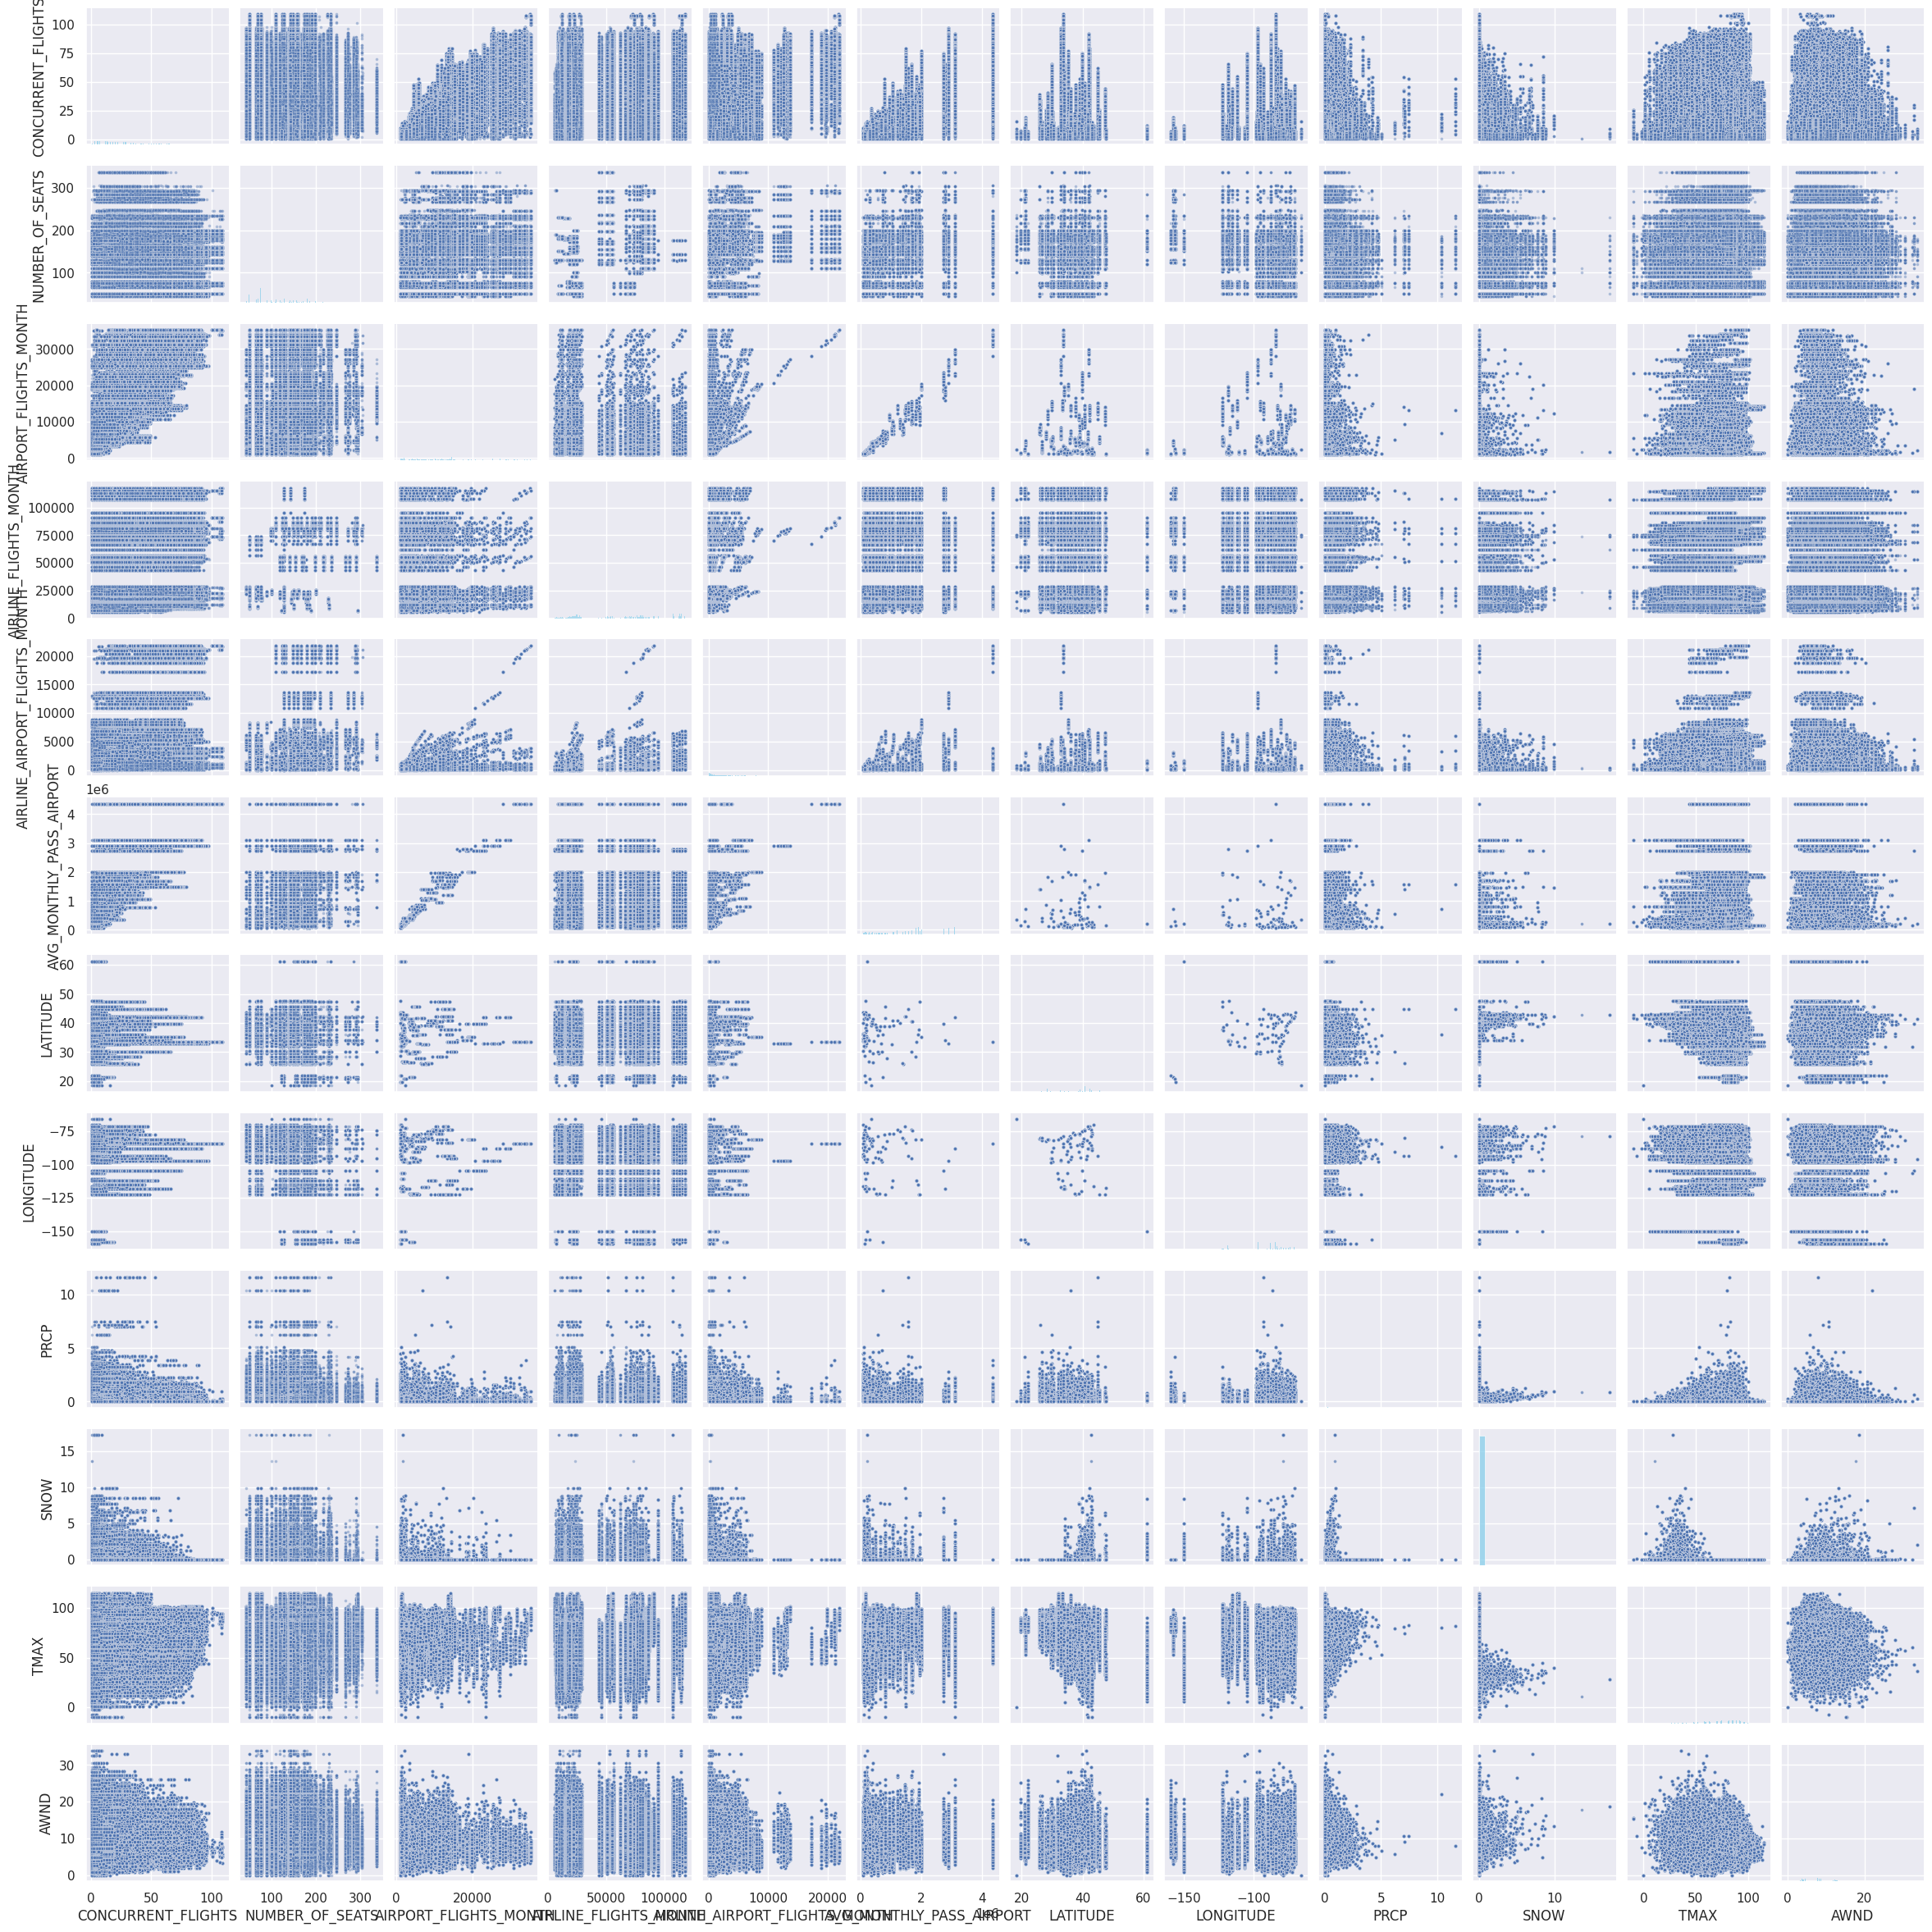

In [31]:
sns.pairplot(
    df_continuous,
    height=2,
    plot_kws={"s": 7, "alpha": 0.4, "edgecolor": "w"},
    diag_kws={"fill": True, "color": "skyblue"}
)


### Pair plots visually map the full landscape of feature relationships, 
### helping both technical teams and business stakeholders pinpoint the strongest operational and weather drivers behind flight delays. 
### Patterns seen here will guide targeted analytics and proactive planning for improving on-time performance.

In [33]:
 df_discrete = df_flights[cols_continuous[~cols_continuous].index]
df_discrete.shape

(6460589, 10)

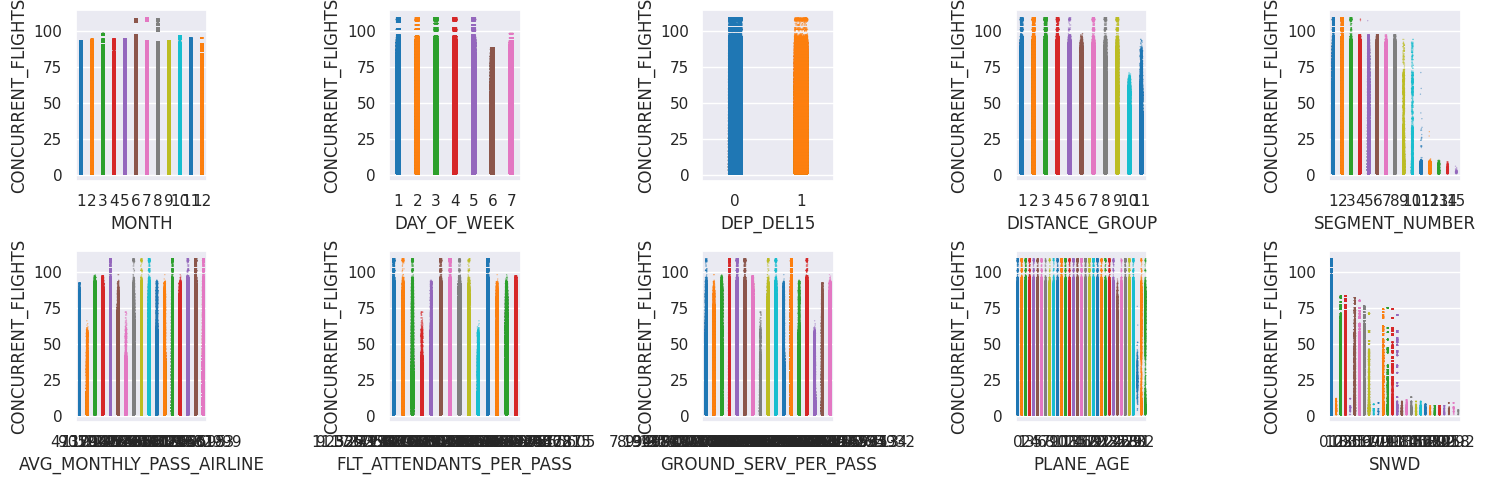

In [34]:
# Establish number of columns and rows needed to plot all features
n_cols = 5
n_elements = len(df_discrete.columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")

# Specify y_value to spread data (ideally a continuous feature)
y_value = df_flights["CONCURRENT_FLIGHTS"]

# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15, n_rows * 2.5))

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_discrete.columns, axes.ravel()):
    sns.stripplot(data=df_flights, x=col, y=y_value, ax=ax, palette="tab10", size=1, alpha=0.5)
plt.tight_layout();

### The above visual shows strip plots for each discrete (categorical or ordinal) feature in your flight delay dataset, 
### with the number of concurrent flights (y-axis) plotted against different categories (x-axis) such as 
### month, day of week, delay status, distance group, segment number, and several operational/crew variables.

# Feature relationships
Let’s take a look at relationships between features. More precisely how they correlate. The quickest way to do so is to use .corr() function of the pandas. We compute the feature correlation matrix for all numerical features.

In [42]:
df_corr = df_continuous.corr(method="pearson")

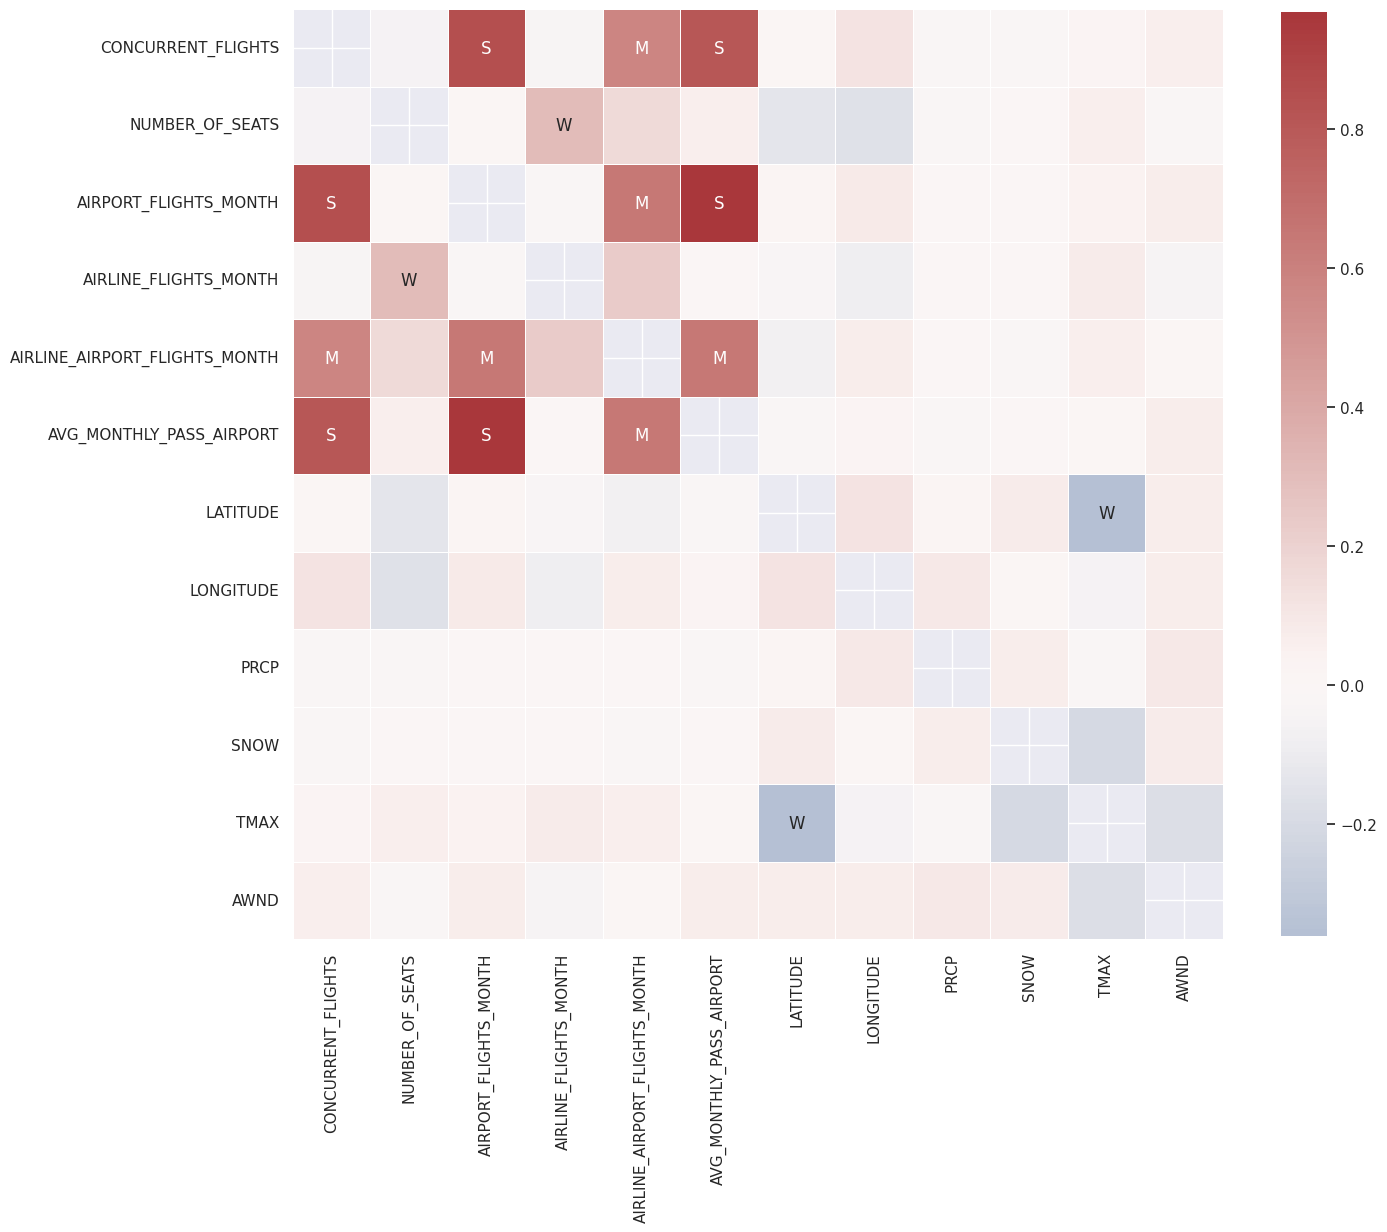

In [43]:
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

### Only some features show strong relationships with one another (highlighted blocks), which can inform feature selection—these correlations might indicate operational dependencies or shared drivers of delay risk (e.g., flights vs. airport traffic, passenger volume, time).
### Invisible or pale blocks mean those feature pairs don’t move together and don’t duplicate information—these features add value in your model by bringing in independent signals that might help catch rare delay drivers.

In [45]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
df_corr_stacked

TMAX                           LATITUDE                        -0.36
                               SNOW                            -0.21
AWND                           TMAX                            -0.17
LONGITUDE                      NUMBER_OF_SEATS                 -0.16
LATITUDE                       NUMBER_OF_SEATS                 -0.14
                                                                ... 
AVG_MONTHLY_PASS_AIRPORT       AIRLINE_AIRPORT_FLIGHTS_MONTH    0.64
AIRLINE_AIRPORT_FLIGHTS_MONTH  AIRPORT_FLIGHTS_MONTH            0.65
AVG_MONTHLY_PASS_AIRPORT       CONCURRENT_FLIGHTS               0.81
AIRPORT_FLIGHTS_MONTH          CONCURRENT_FLIGHTS               0.85
AVG_MONTHLY_PASS_AIRPORT       AIRPORT_FLIGHTS_MONTH            0.97
Length: 66, dtype: float64

## During the graphs, the green color will be flights that have arrived on time, and red is delayed flights, exactly like the boards in the airport.

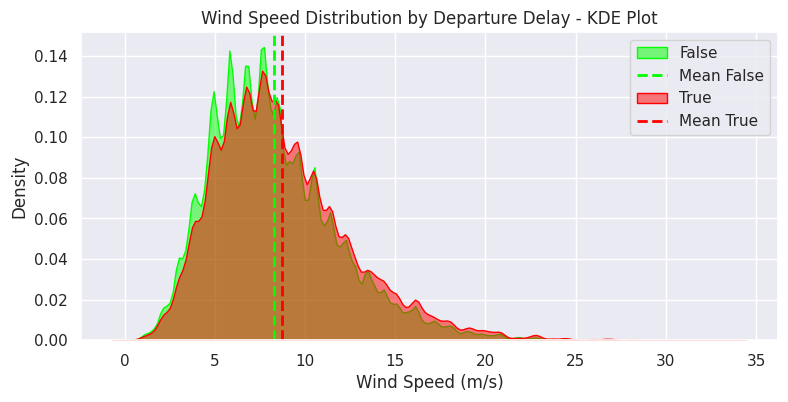

In [46]:
data_class0 = df_flights[df_flights['DEP_DEL15'] == 0]['AWND']
data_class1 = df_flights[df_flights['DEP_DEL15'] == 1]['AWND']
plt.figure(figsize=(9, 4))

sns.kdeplot(data_class0, color='lime', label='False', alpha=0.5, fill = True)
plt.axvline(data_class0.mean(), color='lime', linestyle='--', linewidth=2, label='Mean False')
sns.kdeplot(data_class1, color='red', label='True', alpha=0.5, fill = True)
plt.axvline(data_class1.mean(), color='red', linestyle='--', linewidth=2, label='Mean True')


plt.legend()
plt.title('Wind Speed Distribution by Departure Delay - KDE Plot')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Density')
plt.show()

### The KDE plot shows how wind speed varies for on-time vs. delayed flights. Both distributions peak around 7–9m/s, but delayed flights slightly skew right, indicating that higher wind speeds are associated with a greater likelihood of delays.

<Axes: title={'center': 'Max Tempartue Across Months - Line Plot'}, xlabel='Month', ylabel='Max Temparture (F)'>

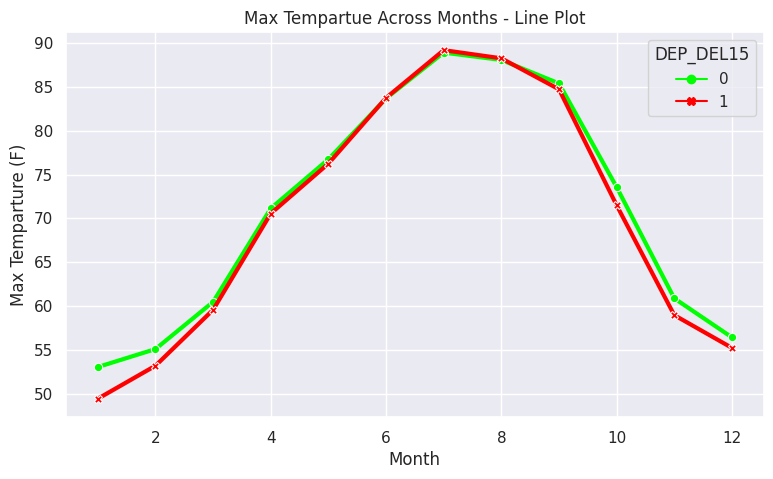

In [59]:
plt.figure(figsize=(9, 5))
plt.title("Max Tempartue Across Months - Line Plot")
plt.xlabel("Month")
plt.ylabel("Max Temparture (F)")
sns.lineplot(x = df_flights.MONTH, y = df_flights.TMAX, hue = df_flights.DEP_DEL15, palette={0: 'lime', 1: 'red'}, style=df_flights.DEP_DEL15, markers=True, dashes=False, linewidth = 3)

# Maximum temperature varies seasonally, but does not differentiate delayed flights from on-time ones. Temperature, by itself, is not a key driver of flight delays—focus attention on other operational or weather features when assessing risk.

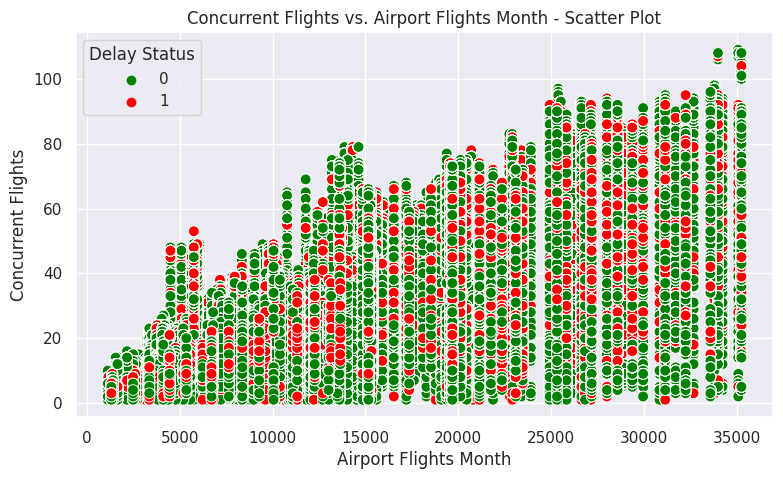

In [60]:
plt.figure(figsize=(9, 5))
sns.scatterplot(y = df_flights.CONCURRENT_FLIGHTS, x = df_flights.AIRPORT_FLIGHTS_MONTH, hue = df_flights.DEP_DEL15, s = 60, palette={0: 'green', 1: 'red'})
plt.title('Concurrent Flights vs. Airport Flights Month - Scatter Plot')
plt.xlabel('Airport Flights Month')
plt.ylabel('Concurrent Flights')
plt.legend(title='Delay Status')
plt.show()

### As airport and scheduling congestion grows, delay likelihood increases—
### requiring targeted congestion management and proactive operational planning to minimize disruptions and deliver reliable service.

<Axes: title={'center': 'Segment Number Across Distance Groups - Bar Plot'}, xlabel='DISTANCE_GROUP', ylabel='SEGMENT_NUMBER'>

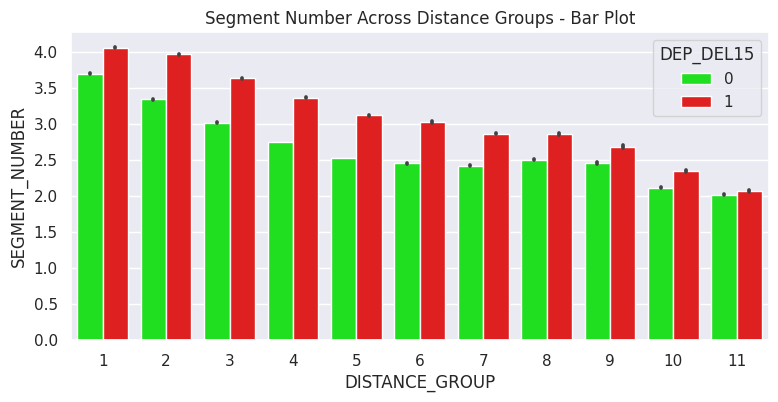

In [61]:
plt.figure(figsize=(9, 4))
plt.title("Segment Number Across Distance Groups - Bar Plot")
plt.xlabel("Distance Group")
plt.ylabel("Segment Number")
sns.barplot(x = df_flights.DISTANCE_GROUP, y = df_flights.SEGMENT_NUMBER, hue = df_flights.DEP_DEL15, palette={0: 'lime', 1: 'red'})

### Across all distance groups, delayed flights (red) tend to occur in later segments of the aircraft’s operational cycle compared to on-time flights (green). 
### This means delay risk builds up across the day as planes make multiple trips, especially on shorter-distance routes.

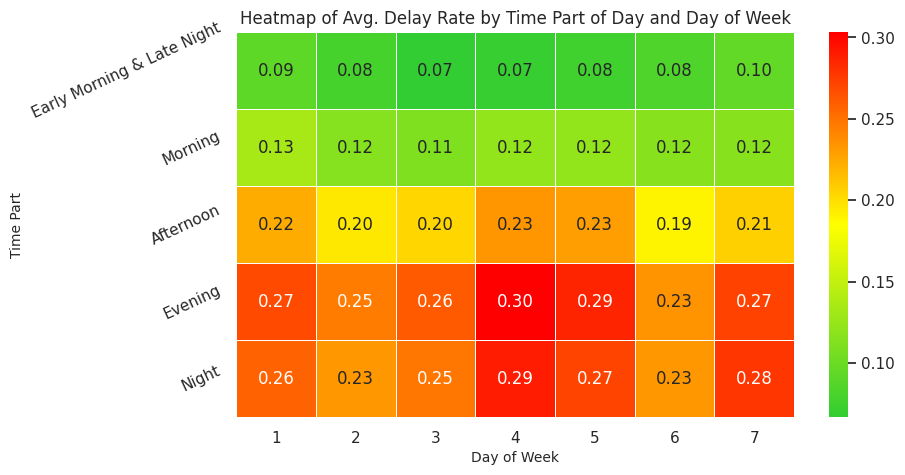

In [63]:
heatmap_data = pd.pivot_table(
    df_flights,
    values='DEP_DEL15',
    index='PART_OF_DAY',
    columns='DAY_OF_WEEK',
    aggfunc='mean'
)

custom_cmap = LinearSegmentedColormap.from_list('custom', ['limegreen', 'yellow', 'red'])

plt.figure(figsize=(9, 5))
sns.heatmap(heatmap_data, annot=True, cmap=custom_cmap, fmt='.2f', linewidths=.5)

plt.title('Heatmap of Avg. Delay Rate by Time Part of Day and Day of Week', fontsize=12)
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Time Part', fontsize=10)
plt.yticks(rotation=25)
plt.show()

### Day-to-day differences are minimal—time of day matters more than day of week for predicting delays.
### Early morning slots remain the most reliable for on-time departures, suitable for premium scheduling or critical operations.

# ==================END OF EDA====================